# DB Analysis
## With a few hundred papers in the DB, some experiments can be done on the data.


### 1. Connecting to the DB

In [1]:
import mariadb
import json

In [2]:
with open('../credentials.json', 'r') as crd_json_fd:
    json_text = crd_json_fd.read()
    json_obj = json.loads(json_text)

In [3]:
credentials = json_obj["Credentials"]
username = credentials["username"]
password = credentials["password"]

In [4]:
table_name = "publications"
db_name = "ubbcluj"

In [5]:
mariadb_connection = mariadb.connect(user=username, password=password, database=db_name)
mariadb_cursor = mariadb_connection.cursor()

### 2. Counting publications.

In [6]:
queryString = "SELECT COUNT(*) FROM "
queryString += table_name

In [7]:
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)


In [8]:
for item in mariadb_cursor:
    count = item[0]
    print("Number of publications: {0}".format(count))
    

Number of publications: 705


### 3. Distinct Affiliations

In [9]:
queryString = "SELECT Affiliations, COUNT(*) AS c FROM publications GROUP BY Affiliations ORDER BY c DESC"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

affiliations = []
for item in mariadb_cursor:
    Affiliation = item[0]
    affiliations.append(item[0])
    c = item[1]
    print("{0} : {1} occurences".format(Affiliation, c))

 : 292 occurences
Studia Universitas Babes-Bolyai : 13 occurences
Studia Universitatis "Babes-Bolyai" : 13 occurences
Studia Universitatis Babeș-Bolyai Series Informatica : 8 occurences
International Journal of Computers : 7 occurences
Proceedings of the Symposium Colocviul Academic Clujean de INFORMATICA : 6 occurences
Zilele Academice Clujene (ZAC) : 5 occurences
Studies in Informatics and Control : 4 occurences
Knowledge Engineering: Principles and Techniques : 4 occurences
Studia Universitatis Babes- : 4 occurences
The Genetic and Evolutionary Computation Conference : 3 occurences
Editura Albastră : 3 occurences
International Journal on Artificial Intelligence Tools (IJAIT) : 2 occurences
Applied Soft Computing : 2 occurences
The International Journal of Information Technology and Intelligent Computing : 2 occurences
EuroGP2006 & EvoCOP2006 : 2 occurences
Acta Universitatis Apulensis : 2 occurences
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics : 2

In [10]:
for i in affiliations:
    if "conference" in [k.lower() for k in i.split()]:
        print(i)

The Genetic and Evolutionary Computation Conference
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics
the 2016 IEEE 12th International Conference on Intelligent Computer Communication and Processing
2008 IEEE-TTTC International Conference on Automation
The 25th International Conference on Software, Telecommunications and Computer Networks (SoftCOM)
International Conference on Next Generation Web Services Practices (NWeSP)
2nd International Conference on Intelligent Computer Communication and Processing (ICCP)
rd Balkan Conference in Informatics
The 19th International Conference on Artificial Intelligence and Soft Computing 
GECCO 2019 (Proceedings of the Genetic and Evolutionary Computation Conference Companion
KES 2019 (Proceedings of the 23rd International Conference on Knowledge-Based and Intelligent Information Engineering Systems
ICSOFT 2019 (The 14th International Conference on Software Technologies (ICSOFT 2019)
SEKE 2019 (Proc. of the 31st Interna

In [11]:
for i in affiliations:
    if "journal" in [k.lower() for k in i.split()]:
        print(i)

International Journal of Computers
International Journal on Artificial Intelligence Tools (IJAIT)
The International Journal of Information Technology and Intelligent Computing
Journal of chemical information and computer sciences 40 (4), 1052-1061
INFOCOMP Journal of Computer Science
Journal of Artificial Evolution and Applications
Journal of chemical information and computer sciences 42 (6), 1363-1369
Journal of chemical information and computer sciences 36 (3), 465-482
Journal of chemical information and computer sciences 37 (3), 510-516
Journal of chemical information and computer sciences 36 (6), 1098-1108
Journal of chemical information and computer sciences 35 (5), 851-857
International Journal of Computer Information Systems and Industrial …
International Journal of Innovative Computing Information and Control
International Journal of Innovative Computing
Journal of Systems and Software
IJCSNS International Journal of Computer Science and Network Security
IJCTA - International J

In [12]:
tokens = []
for i in affiliations:
    words = i.split()
    for word in words:
        tokens.append(word)
tokens

['Studia',
 'Universitas',
 'Babes-Bolyai',
 'Studia',
 'Universitatis',
 '"Babes-Bolyai"',
 'Studia',
 'Universitatis',
 'Babeș-Bolyai',
 'Series',
 'Informatica',
 'International',
 'Journal',
 'of',
 'Computers',
 'Proceedings',
 'of',
 'the',
 'Symposium',
 'Colocviul',
 'Academic',
 'Clujean',
 'de',
 'INFORMATICA',
 'Zilele',
 'Academice',
 'Clujene',
 '(ZAC)',
 'Studies',
 'in',
 'Informatics',
 'and',
 'Control',
 'Knowledge',
 'Engineering:',
 'Principles',
 'and',
 'Techniques',
 'Studia',
 'Universitatis',
 'Babes-',
 'The',
 'Genetic',
 'and',
 'Evolutionary',
 'Computation',
 'Conference',
 'Editura',
 'Albastră',
 'International',
 'Journal',
 'on',
 'Artificial',
 'Intelligence',
 'Tools',
 '(IJAIT)',
 'Applied',
 'Soft',
 'Computing',
 'The',
 'International',
 'Journal',
 'of',
 'Information',
 'Technology',
 'and',
 'Intelligent',
 'Computing',
 'EuroGP2006',
 '&',
 'EvoCOP2006',
 'Acta',
 'Universitatis',
 'Apulensis',
 'MECO45',
 '45th',
 'Conference',
 'of',
 'the'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


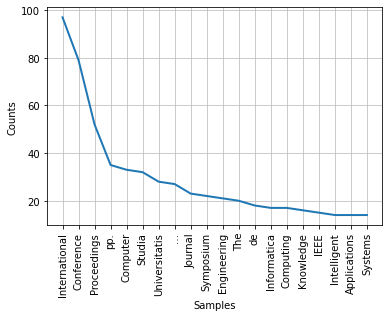

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    #print(str(key) + ':' + str(val))
    pass
freq.plot(20, cumulative=False)

### 3. TF-IDF and K-Means?


### 3. Distinct Affiliations

In [14]:
queryString = "SELECT Title FROM publications"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

titles = []
for item in mariadb_cursor:
    Title = item[0]
    titles.append(item[0])

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
corpus = titles[:]
corpus

['A Comparative Study of Software Architectures in Mobile Applications',
 'The Use of Simple Cellular Automata in Image Processing',
 'Support Vector Machine and Boosting based Multiclass Classification for Traffic Scene Obstacles',
 'Obstacle Recognition in Traffic by Adapting the HOG Descriptor and Learning in Layers',
 'Descriptors fusion and genetic programming for breast cancer detection',
 'Multi-objective breast cancer classification by using Multi-Expression Programming',
 'Pedestrian Recognition by Using Kernel Descriptors',
 'Improving classification performance of Support Vector Machine by genetically optimisation of kernel shape and hyper-parameters',
 'How the Kernels Can Influence Image Classification Performance',
 'Alignment of Custom Standards by Machine Learning Algorithms',
 'Model Alignment by Using the Concept Definition',
 'Evolutionary design of Evolutionary Algorithms',
 'Genetic Programming with linear representation – a survey',
 'An autonomous GP-based system

In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [18]:
print(vectorizer.get_feature_names())

['00447', '09', '10', '101', '105', '110', '120', '125', '128', '131', '163', '17th', '183', '187', '195', '1985', '1996', '1999', '19th', '2003', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018', '2019', '2020', '207', '217', '222', '24', '253', '254', '257', '264', '27', '273', '2d', '2nd', '35', '38', '3d', '456', '465', '485', '486', '5597', '775', '782', '80', '88', '89', '91', '93', '95', 'abordare', 'abordari', 'about', 'abs', 'abstract', 'academic', 'accelerate', 'acceleration', 'accelerometer', 'access', 'accessibility', 'according', 'accurate', 'acivs', 'acknowledgement', 'aco', 'acquired', 'acrylonitrile', 'action', 'active', 'activitatii', 'activities', 'activity', 'actuala', 'adaptarii', 'adaptation', 'adapting', 'adaptive', 'additional', 'administration', 'admission', 'advanced', 'adventure', 'afectiv', 'affective', 'affinity', 'agent', 'agenti', 'agentilor', 'agents', 'agglomerative', 'aggregated', 'aggregation', 'agile', 'ai', 'aide

In [19]:
print(X.shape)

(705, 1545)


In [20]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
for k in X.toarray():
    for j in k:
        if j > 1:
            print(j)

2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [22]:
import pandas as pd

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,00447,09,10,101,105,110,120,125,128,131,...,wrist,writing,wyliodrin,xml,year,your,zsuzsanna,évolutive,în,şabloanele
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0.0,0.0,0.0,0.000000,0.0,0.058824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
701,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
702,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = CountVectorizer(tokenizer=textblob_tokenizer)
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,'inteligenta,09,1,10,120-131,125-128,163-187,17th,183-195,1985–1996,...,your,zsuzsanna,évolut,în,β-x,–,’,“,”,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(corpus)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())


c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv

In [26]:
for word in df.columns:
    for row in df[word]:
        if row != 0.0:
            print(word, row)

'inteligenta 0.3843092611701704
09 0.3620909854998346
1 0.4999710440648589
1 0.27047713200642143
1 0.28162173033351795
10 0.5199746375524767
10 0.6004487342838786
120-131 0.4147683962507424
125-128 0.3249614688294402
163-187 0.3944132840753058
17th 0.33134417844467834
183-195 0.3081706488185934
1985–1996 0.30159847621566765
1999 0.2706004125065521
1999-molecular 0.2706004125065521
19th 0.24449139173252873
2 0.3081706488185934
2-4 0.33471464247746835
2007 0.4451877771750181
2008 0.2899731644055078
2008 0.3484108816000741
2009 0.5800977910393726
2009 0.2714421083290334
2009 0.3290361337727512
2009 0.33484636287365666
2010 0.27047713200642143
2010 0.27570464165715064
2010 0.33820046421713007
2011 0.3307554605508426
2012 0.3249614688294402
2013 0.4288653800061575
2014 0.5423828384129328
2015 0.5191827560265936
2015 0.37600572278661676
2017 0.39676744870004194
2018 0.46010833804176665
2018 0.37415624025321853
2019 0.35477935452217313
2019 0.35459857095563435
2019 0.3091834674138551
2020 0.3

automat 0.33225166933877515
automat 0.356741233459545
automat 0.24317988483313585
automat 0.2885565343842454
automat 0.3729463992534741
automata 0.3623333955743498
automata 0.4026543157948542
automata 0.3246337345650595
automata 0.37982067323309476
automata 0.3080743612585969
automata 0.3396144555955822
automata 0.3623333955743498
automata 0.3177756849938108
automata 0.37982067323309476
automata 0.3038212385776386
automata 0.3390827096531763
automata 0.3372836036687217
automata 0.5651933093757354
automata 0.4294944935462334
automata 0.32739714292453215
automata 0.3069070319275497
automata 0.3279954310474071
automata 0.4076301799778419
automata 0.3086750993251261
automata 0.38175764745125773
automata 0.3480802080155067
automata 0.34654971321184286
automata 0.3058165375550264
automata 0.3428580374825508
automata-bas 0.650363399581124
automatiqu 0.5277068818564219
automată 0.33773759388317015
autonom 0.48270319527918587
autonom 0.41506048312907784
autonom 0.32455178830046866
autonom 0.479

congest 0.42013518879422457
congest 0.41168219689272
congest 0.42167715647833265
congest 0.42013518879422457
congest 0.5451457282083256
connect 0.41713791152136115
connect 0.3959253350630093
conquer 0.4369213546006361
consecinţ 0.37684958335072755
consequ 0.3400672763785702
constraint 0.4996077967669979
constraint 0.4284643340792725
constraint 0.5100167040789393
constraint 0.4786965521017652
constraint 0.2837006904986716
construct 0.46692661264996094
construct 0.3635930863469792
content 0.4080089537821808
content 0.4375739015683377
content 0.5525593446419225
content 0.32314563213779496
context 0.45545164370423064
context 0.38077839027819416
context 0.4109090636338521
context 0.43972728416352247
context 0.34924509048095187
context 0.457076764052147
context 0.342890169318671
context 0.26350274196953366
context 0.28800220673407756
context-awar 0.6270779416169244
context-awar 0.4037411206995011
context-bas 0.36473716637969555
contour 0.5181939681036728
contour 0.3522803442666501
contribut 

evolut 0.4338669253916709
evolut 0.42581978717231683
evolut 0.4375182295236464
evolut 0.5351553782528967
evolut 0.5235182938681653
evolutionari 0.8133755838563085
evolutionari 0.23813290591103423
evolutionari 0.3234199465538607
evolutionari 0.3221566173298881
evolutionari 0.30838685686729606
evolutionari 0.2698951340753496
evolutionari 0.6321702982997893
evolutionari 0.25442856467486
evolutionari 0.2708930440006753
evolutionari 0.32729823631704363
evolutionari 0.43072685521764825
evolutionari 0.3256124736090159
evolutionari 0.35347433618438057
evolutionari 0.29833549161795636
evolutionari 0.23770761615426156
evolutionari 0.3528364650029418
evolutionari 0.32433248620802946
evolutionari 0.3212343076196849
evolutionari 0.2456633546215876
evolutionari 0.29143635962394504
evolutionari 0.2661613472913223
evolutionari 0.25495511170666946
evolutionari 0.24694279983441492
evolutionari 0.27227941051102017
evolutionari 0.2622874859596619
evolutionari 0.4282953771392624
evolutionari 0.313471004994

inform 0.3428786247319245
inform 0.46769562551612787
inform 0.5810496957328448
inform 0.3829884459100202
informat 0.3690586893509374
informatica 0.3279181589328856
informatica 0.3085605575354816
informatica 0.5
informatiqu 0.4122042758853497
initi 0.31735031951517473
initi 0.3767404138645806
input-output 0.4162284394933733
insid 0.304042467467979
insid 0.37194945166392607
insid 0.4816934185161766
insight 0.4308952158400407
insight 0.4445707298392428
insight 0.46698687103982556
inspir 0.5167919204242422
inspir 0.35065856542045337
instanc 0.3026396385292718
instanc 0.47795167173912173
int 0.2885527155358408
int 0.2899731644055078
integr 0.3574043666683193
integr 0.3983127919264228
integr 0.43260652591909005
integr 0.34964154488074445
integr 0.4918067560276474
intelig 0.282218262491968
inteligent 0.5310104495086319
inteligenta 0.36601667976899493
inteligenti 0.34440338580164365
inteligenti 0.5539422754608535
inteligenţa 0.39724234712172085
intellectuel-form 0.4122042758853497
intellig 0.3

new 0.2680322203153057
new 0.3663818017010096
new 0.4419208354420971
new 0.28451406424561243
new 0.3193102919097046
new 0.3111539185643703
new 0.2278635151800207
new 0.3047413273803566
new 0.29446776764700733
new 0.17987865078023205
new 0.2637343929481919
new 0.3899314734507202
new 0.28334633859665476
new 0.18986089110261478
nlp 0.3976366970190217
node-weight 0.5335374623002467
non-degener 0.39369735118083704
non-degener 0.3809746810804499
notar 0.3690586893509374
note 0.28308159943078987
note 0.2947455456433417
novel 0.39285415657197803
novel 0.31885273759775773
novel 0.45352790198534615
novel 0.5931003066691197
noyaux 0.40323209698383866
np-difficult 0.6040064633802132
nsga 0.3599889049989543
nuclei 0.5787923484349498
number 0.3612004971908587
number 0.3550909973793854
o 0.31015363616424635
o 0.2655532671315279
obiect 0.37684958335072755
object 0.4023068464122439
object 0.3390826697242664
object 0.3319349417702652
object 0.3276216844873168
object 0.3505698867459207
object 0.286467813

recognit 0.42636455145210767
recognit 0.3270635139846019
recognit 0.3672919730084332
recognit 0.39407233578577516
recognit 0.37660331713046297
recognit 0.3708941750355148
recognit 0.3976712050255395
recognit 0.32317619593902674
recognit 0.3210932101280391
recognit 0.36836361918437766
recognit 0.25316947909446474
recognit 0.43131634186814666
recognitio 0.4003830423924152
recombin 0.43032901434657306
recombin 0.42431657437960296
recommend 0.4290781989284937
reconfigur 0.434881646966612
recruit 0.6010830203928896
recunoaster 0.4233690169850395
reduc 0.40141426687563725
reduct 0.4306217071099541
redundanţei 0.43520069466468114
reengin 0.5351959848649198
refactor 0.4137335288700921
refactor 0.33184785679617673
refactor 0.4830484626397366
refactor 0.43272637255337265
refactor 0.38376345538030876
refactor 0.4051058733073482
refactor 0.41709366033876905
refactor 0.5187958543306541
refactor 0.43772506587279686
refactor 0.5684611514797939
refactor 0.36396414101501307
refactor 0.4762656656182134


svm 0.48053102903430933
svm 0.3680057335099129
svm 0.28590927046227266
svm 0.45819515849316766
svm 0.4347007334727678
svm 0.2937447422238523
svm 0.448453686701559
swarm 0.3957446644618619
swarm 0.48908580026668697
swarm 0.4364490037115749
swarm 0.4093607822832706
swarm 0.4220556885077366
switch 0.41222940538690345
symposium 0.3160650860098905
symposium 0.23449034136587082
symposium 0.29740719292301243
symposium 0.727373500661763
synasc 0.3635930863469792
synasc 0.3484108816000741
synchron 0.35167103501962194
synchron 0.398045938951084
synchron 0.3866675643457724
synchron 0.4516468662583701
synchron 0.4154052145796484
synchron 0.38362255204502077
tabl 0.4162284394933733
task 0.2701719529650064
task 0.3757366250820261
task 0.49295636958591266
task 0.42010749364982586
task 0.3976555689227771
tcp 0.5203195539818825
teach 0.4946913424783941
teach 0.3267308016685115
team 0.46972855539736713
team 0.5133924696147281
techniqu 0.3627273208436656
techniqu 0.19428345394086852
techniqu 0.3142642030

In [27]:
from sklearn.cluster import KMeans

In [28]:
number_of_clusters = 10

In [29]:
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(n_clusters=10)

In [30]:
km.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [31]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: model base softwar support applic
Cluster 1: distribut multi-ag design manag approach
Cluster 2: fuzzi cluster analysi data use
Cluster 3: cluster aspect base hierarch softwar
Cluster 4: program genet synchron object-ori wireless
Cluster 5: algorithm structur protein evolutionari genet
Cluster 6: cellular automata imag evolv comput
Cluster 7: problem solv optim sensit approach
Cluster 8: use associ rule relat predict
Cluster 9: network complex evolutionari detect commun


In [32]:
results = pd.DataFrame({
    'corpus': corpus,
    'category': km.labels_
})

In [33]:
results.sort_values('category')
for k in results.sort_values('category').values:
    print(k[1], " --- ", k[0])

0  ---  A Comparative Study of Software Architectures in Mobile Applications
0  ---  An intelligent route management system for electric vehicle charging
0  ---  Urban bicycles renting systems: Modelling and optimization using nature-inspired search methods
0  ---  S4MPLEâSampler for Multiple Protein-Ligand Entities: Methodology and Rigid-Site Docking Benchmarking
0  ---  MobiContext: A Context-Aware Cloud-Based Venue Recommendation Framework
0  ---  Limbajul JavaScript: aplicatii in programarea distribuita (JavaScript: distributed applications)
0  ---  Aplicatii specifice INTRANET (INTRANET applications)
0  ---  Design and implementation of an MPLS based load balancing architecture for Web switching
0  ---  Macro-routing: a new hierarchical routing protocol
0  ---  SINE - Sistem Informatic de Notare si Evaluare a Activitatii de Laborator
0  ---  Dirijare 'inteligenta' a traficului de date cu cerinte specifice
0  ---  SINE - a System with Interactive ackNowledgement and Evaluation of

4  ---  Designing a Component-Based Machine using Multi Expression Programming
4  ---  Implementing Efficient Data Synchronization for Mobile Wireless Medical Users
4  ---  EFFICIENT DATA SYNCHRONIZATION FOR MOBILE WIRELESS MEDICAL USERS
4  ---  A Comparison of Genetic Programming and Statistical Methods for Solving Prediction Problems
4  ---  Unsupervised transformation of procedural programs to object-oriented design
4  ---  Implementing data synchronization on mobile wireless agents
4  ---  Building an efficient architecture for data synchronization on mobile wireless agents
4  ---  Mobile Devices and Data Synchronization Assisting Medical Diagnosis
4  ---  Descriptors fusion and genetic programming for breast cancer detection
4  ---  Multi-objective breast cancer classification by using Multi-Expression Programming
4  ---  MPI Scaling Up for Powerlist Based Parallel Programs,
4  ---  Formalizing the refactoring impact on internal program quality
4  ---  Genetic Programming with lin

9  ---  Game theory and extremal optimization for community detection in complex dynamic networks
9  ---  MPLS - o realitate actuala sau de viitor? (MPLS - present or future?)
9  ---  Human Activity Recognition and Feature Selection for Stroke Early Diagnosis,
9  ---  Evolutionary Optimisation of Kernel Functions for SVMs
9  ---  Evolutionary Coalition Formation in Complex Networks
9  ---  Context-based Networks – Scale-free or not?Proceedings of the Symposium Colocviul Academic Clujean de INFORMATICA
9  ---  Collaborative Evolutionary Algorithms for detecting Overlapping Communities in Complex Networks,
9  ---  Pedestrian recognition by using a kernel-based multi-modality approach
9  ---  Pedestrian recognition by using a dynamic modality selection approach
9  ---  Pedestrian recognition using a dynamic modality fusion approach
9  ---  Evolutionary Optimisation of Kernel and Hyper-Parameters for SVM
9  ---  Observing the swarm behaviour during its evolutionary design
9  ---  L. Evolut

In [34]:
### GENSIM

In [35]:
from gensim.models import word2vec
from gensim.test.utils import common_texts, get_tmpfile

In [36]:
tokenized_sentences = [[j.lower() for j in st.split() if j not in stopwords.words('english')] for st in corpus]

In [37]:
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)

In [38]:
model.save("word2vec.model")

In [ ]:
#model = word2vec.load("word2vec.model")

In [40]:
model

In [41]:
model.wv["study"]

array([-4.6988489e-04,  2.2370089e-03, -4.8910910e-03,  1.1751713e-03,
        4.9376222e-03, -2.8945392e-03, -5.4656900e-03, -1.0292013e-03,
       -1.4397302e-03,  1.1613069e-03,  2.6049265e-03,  3.9213272e-03,
        1.3138575e-03, -1.7306939e-03,  2.5702189e-03, -3.6285827e-03,
        3.0504677e-03,  4.5590517e-03, -8.6836499e-04, -3.9931274e-05,
       -3.4629670e-03,  2.6053342e-03, -3.3030047e-03, -3.9206669e-03,
        8.5747859e-04, -4.1303034e-03,  3.6028181e-03, -1.1913857e-04,
        4.6464652e-03,  4.9883383e-03,  9.0536196e-04, -3.6363404e-03,
        1.4889752e-03,  1.0853767e-03, -5.6242975e-03, -4.2006528e-04,
        2.1310267e-03, -1.6673816e-03, -2.0734249e-03, -1.8276528e-03,
       -4.7916925e-04,  8.9310698e-04, -3.4712134e-03,  1.3247461e-03,
       -4.3420321e-03, -4.7619226e-03,  4.4305198e-04, -2.0067133e-04,
        4.3870336e-03,  1.7976604e-03, -2.8392659e-03, -1.3071991e-03,
       -6.2882568e-04, -1.3399172e-03, -3.5064400e-03,  7.6233759e-05,
      

In [42]:
words = list(model.wv.vocab)

In [43]:
print(words)

['a', 'comparative', 'study', 'software', 'architectures', 'mobile', 'applications', 'the', 'use', 'simple', 'cellular', 'automata', 'image', 'processing', 'support', 'vector', 'machine', 'boosting', 'based', 'multiclass', 'classification', 'traffic', 'scene', 'obstacles', 'obstacle', 'recognition', 'adapting', 'hog', 'descriptor', 'learning', 'layers', 'descriptors', 'fusion', 'genetic', 'programming', 'breast', 'cancer', 'detection', 'multi-objective', 'using', 'multi-expression', 'pedestrian', 'kernel', 'improving', 'performance', 'genetically', 'optimisation', 'shape', 'hyper-parameters', 'how', 'kernels', 'can', 'influence', 'alignment', 'custom', 'standards', 'algorithms', 'model', 'concept', 'definition', 'evolutionary', 'design', 'linear', 'representation', '–', 'survey', 'an', 'autonomous', 'gp-based', 'system', 'regression', 'problems', 'what', 'else', 'evolution', 'pso', 'telling', 'us?', 'coalition', 'formation', 'full', 'connected', 'scale', 'free', 'networks', 'functions'

In [44]:
X = model[model.wv.vocab]

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [45]:
df = pd.DataFrame(df)

In [46]:
df.shape

(705, 1291)

In [47]:
df.head()

,'inteligenta,09,1,10,120-131,125-128,163-187,17th,183-195,1985–1996,...,year,zsuzsanna,évolut,în,β-x,–,’,“,”,…
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
import numpy as np

In [49]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word in model.wv.vocab:
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in model[word]]) + "\n")
    
out_v.close()
out_m.close()

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
